# Домашнее задание по теме: выбросы (outliers)

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn scipy -y

In [12]:
import numpy as np

np.__version__

'1.19.2'

In [13]:
import pandas as pd

pd.__version__

'1.1.3'

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.__version__

'0.11.0'

In [19]:
import scipy
from scipy import stats

scipy.__version__

'1.5.2'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [20]:
# загрузить датасет в pandas dataframe
df = pd.read_csv('hotel_bookings.csv')
# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Графическое представление выбросов

1. С помощью `boxplot` (пакет `seaborn`) показать, где имеются выбросы. Можно реализовать это любым удобным способом.

1. Сделать выводы по этим изображениям: 
    - Есть ли выбросы?
    - Если есть, то в каких колонках?

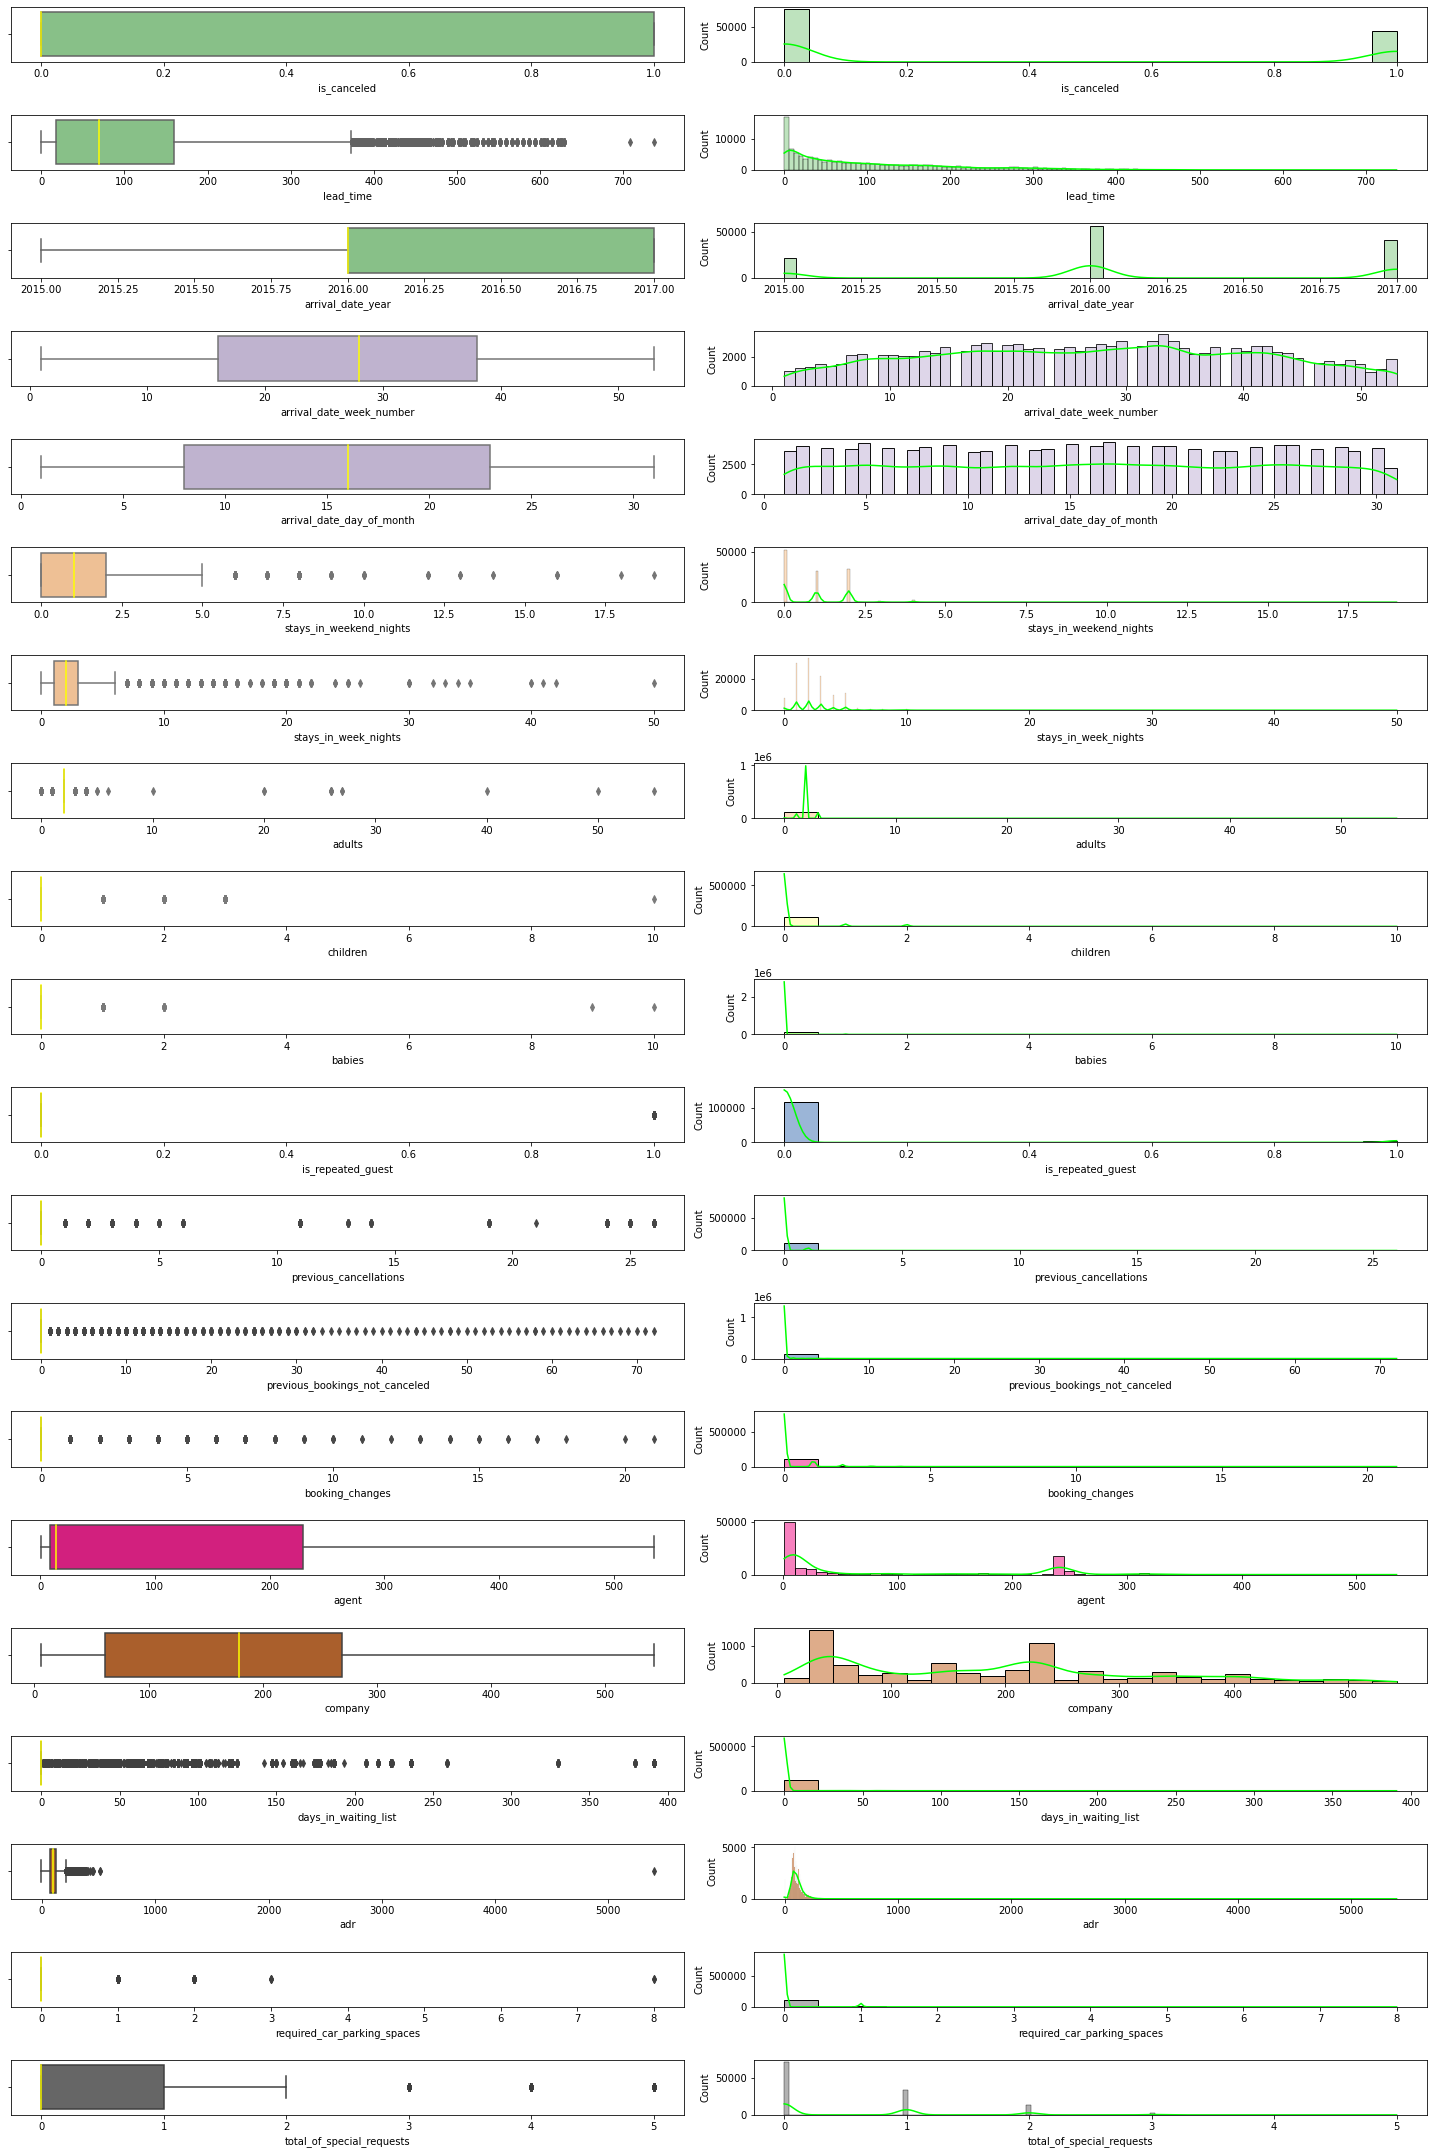

In [52]:
fig, axs = plt.subplots(numeric_cols_len,2 , figsize=(20, 30))

cmap = plt.get_cmap('Accent')

for index, column_name in enumerate(df_numeric_cols):
   
    c = cmap(index/numeric_cols_len)
    
    sns.boxplot(x=df[column_name], ax=axs[index][0], color=c)
    axs[index][0].get_lines()[4].set_color('yellow')
    
    sns.histplot(x=df[column_name], kde=True, ax=axs[index][1], color=c)
    axs[index][1].get_lines()[0].set_color('lime')
        
fig.tight_layout(pad=1.0)  


## Обнаружение и удаление выбросов

### Способ основанный на межквартильном расстоянии (Interquartile range = IQR, Tukey's fences)

1. Выбрать одну или несколько колонок содержащих выбросы.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено.

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

<AxesSubplot:>

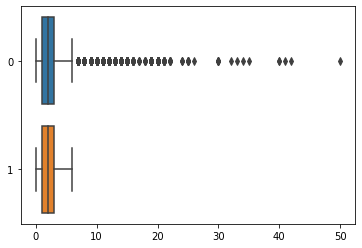

In [50]:
siwn_with_out = df['stays_in_week_nights']

Q1 = siwn_with_out.quantile(0.25)
Q3 = siwn_with_out.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
lower_fence

upper_fence = Q3 + 1.5 * IQR
upper_fence

siwn_with_without_iqr = siwn_with_out[~((siwn_with_out < lower_fence) |
                                     (siwn_with_out > upper_fence))]
siwn_with_without_iqr

len(siwn_with_out) - len(siwn_with_without_iqr)

sns.boxplot(data=[siwn_with_out, 
                  siwn_with_without_iqr], 
            orient='h')

### Способ основанный на Z-оценке (z-score)

1. Выбрать одну или несколько колонок содержащих выбросы. Можно использовать те, что были в IQR-способе.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено. Это больше или меньше, чем способом IQR?

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

<AxesSubplot:>

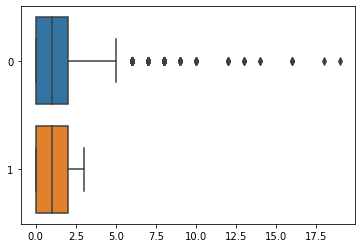

In [53]:
siwn_with_out = df['stays_in_weekend_nights']

z = stats.zscore(siwn_with_out)
z

z_abs = np.abs(z)

z_threshold = 3

siwn_with_without_z = siwn_with_out[z_abs < z_threshold]
siwn_with_without_z

len(siwn_with_out) - len(siwn_with_without_z)

sns.boxplot(data=[siwn_with_out, 
                  siwn_with_without_z], 
            orient='h')